Spectral Index for Source1: α =-0.93 ± 0.034
Max value 0.543995
Chi squared 0.4483360708144799


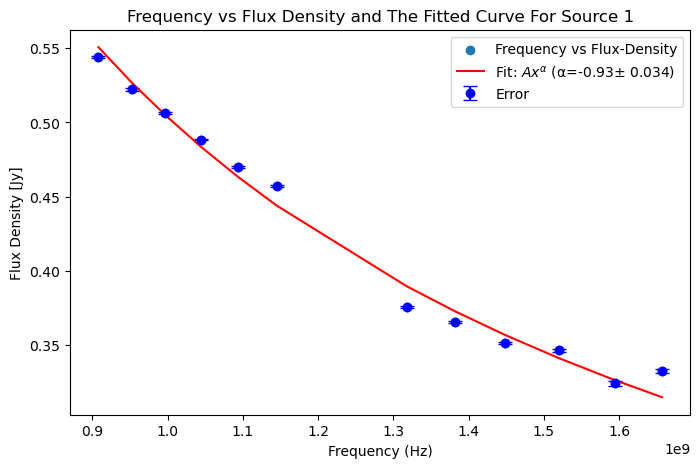

Spectral Index for Source2: α =-1.01 ± 0.03
Max value 0.471632
Chi squared 0.45951437248558874


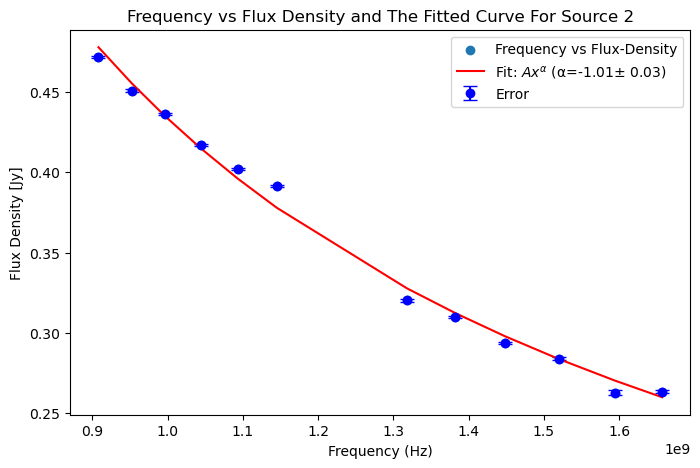

Spectral Index for Source3: α =-1.74 ± 0.085
Max value 0.0298247
Chi squared 0.08760690609035642


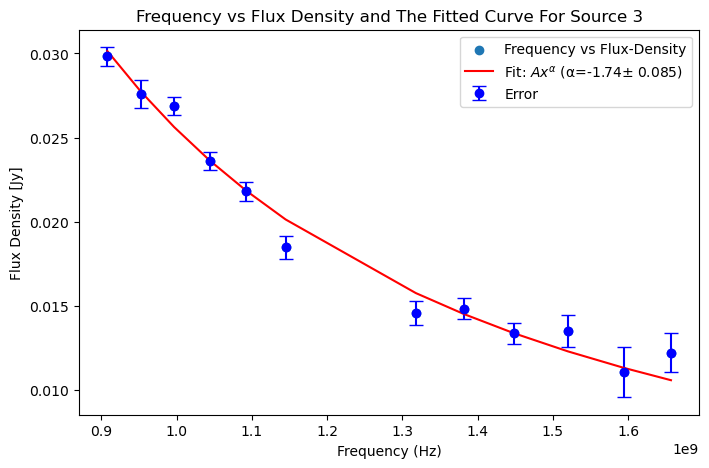

Spectral Index for Source4: α =-2.70 ± 0.129
Max value 0.053555
Chi squared 0.36322692537230294


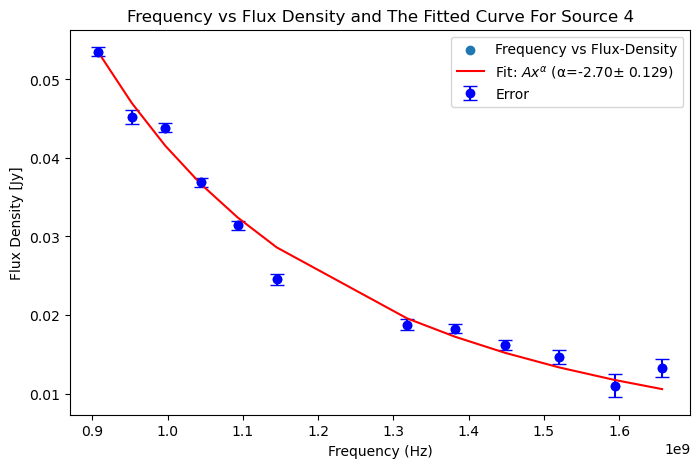

Spectral Index for Source5: α =-2.38 ± 0.177
Max value 0.0284165
Chi squared 0.16072882583231143


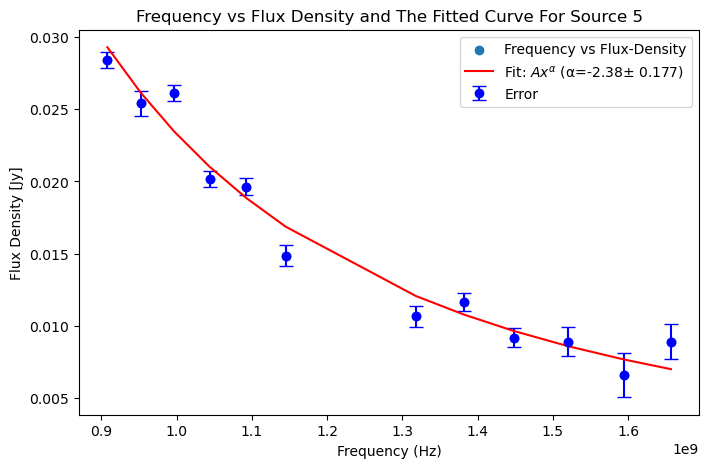

In [1]:
#Name: Relebohile Motloung (MTLREL002) and Yazeed Jacobs ((JCBMOG025)


import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# Define the decaying power-law model function
def decaying_power_law(x, a, b):
    return a * x**(b)

# Find all .txt files in the working directory
file_paths = ["source1.txt", "source2.txt", "source3.txt", "source4.txt", "source5.txt"]
x = [0.4, 0.1]

Sources = ["Source"]

# Loop through each file
n = 1
for file_path in file_paths:
    # Load the data, skipping the first column (FITS file names)
    data = np.loadtxt(file_path, usecols=(2, 3, 4))
    
    # Separate columns
    frequency = data[:, 0]  # Frequency in Hz
    intensity = data[:, 1]  # Intensity values
    errors = data[:, 2]     # Error values
    
    # Fit the model to the data with error weights
    try:
        popt, pcov = curve_fit(decaying_power_law, frequency, intensity, sigma=errors, p0=x, maxfev=10000)
        
        # Extract the fitted parameters
        a, b = popt
        perr = np.sqrt(np.diag(pcov))[1]
        
        # Generate values for the fitted model
        # Sort the frequency values for a smooth line
        sorted_indices = np.argsort(frequency)
        sorted_frequency = frequency[sorted_indices]
        fitted_intensity = decaying_power_law(sorted_frequency, *popt)
        
        # Print the spectral index and maximum intensity
        print(f"Spectral Index for Source{n}: α ={b:.2f} ± {round(perr, 3)}")
        print(f"Max value {max(intensity)}")

        # Initialize chi_sq
        chi_sq = 0

        #Calculate Chi Squared
        # Initialize chi_sq
        chi_sq = 0

        for i in range(12):
            chi_sq = ((intensity [i] - fitted_intensity[i])**2)/ fitted_intensity[i] + chi_sq
        print(f"Chi squared {chi_sq}")
        # Plotting
        plt.figure(figsize=(8, 5))
        plt.scatter(frequency, intensity, label='Frequency vs Flux-Density')
        plt.errorbar(frequency, intensity, yerr=errors, fmt='o', label='Error', color='blue', capsize=5, linestyle='None')
        plt.plot(sorted_frequency, fitted_intensity, label=f'Fit: $Ax^{{\\alpha}}$ (α={b:.2f}± {round(perr, 3)})', color='red')
        plt.xlabel('Frequency (Hz)')
        plt.ylabel('Flux Density [Jy]')
        plt.title(f'Frequency vs Flux Density and The Fitted Curve For Source {n}')
        plt.legend()
        plt.savefig(f"Fitted_Curve_Source{n}")
        plt.show()
        n += 1
    except RuntimeError as e:
        print(f"Error fitting file {file_path}: {e}")

print("\n \n")
